# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv(r'C:\Users\user\data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

###### Импортируем необходимые библиотеки

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

###### Выведем общую информацию о наборе данных

In [23]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


###### Основные показатели описательной статистики

In [24]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,2.133100e+04
mean,0.474005,67148.972133,43.277952,0.816980,0.974497,0.081196,1.653427e+05
std,0.752378,139281.142318,12.575300,0.549282,1.421787,0.273143,9.831399e+04
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.525170,33.000000,1.000000,0.000000,0.000000,1.075070e+05
50%,0.000000,1996.732855,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5337.759969,53.000000,1.000000,1.000000,0.000000,1.958420e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


###### Построим гистограмму количества семей по наличию детей

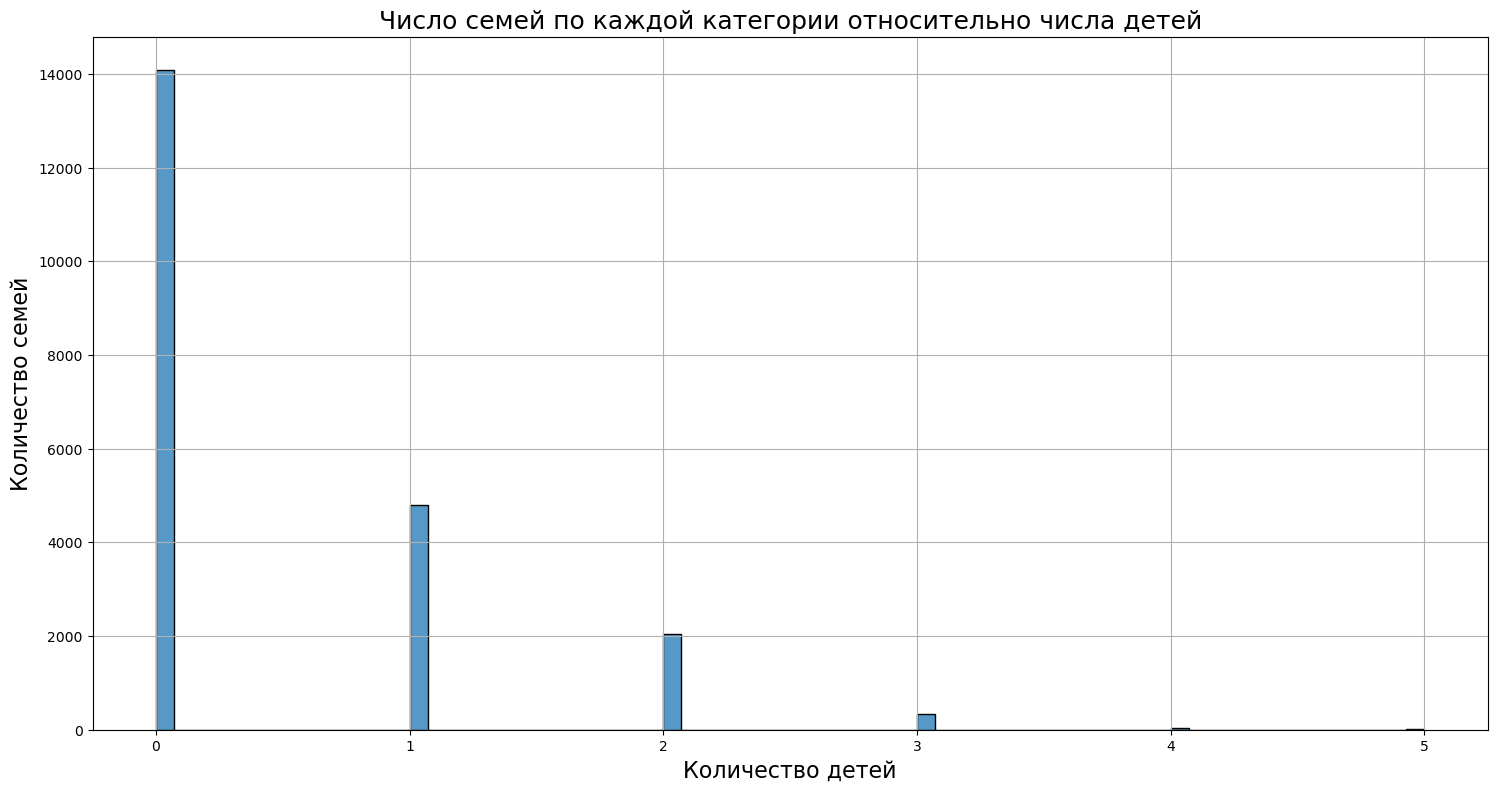

In [25]:
plt.figure(figsize=(18,9))
sns.histplot(data['children'])
plt.title('Число семей по каждой категории относительно числа детей', fontsize=18)
plt.xlabel('Количество детей', fontsize=16)
plt.ylabel('Количество семей', fontsize=16)
plt.grid()
plt.show()

###### Посчитаем общее количество семей с разным количеством детей.

In [26]:
data['children'].value_counts(normalize=True).to_frame().style.format('{:.0%}').background_gradient(cmap='Blues')

,proportion
children,
0,66%
1,23%
2,10%
3,2%
4,0%
5,0%


###### Подсчитаем общее количество заемщиков, имеющих задолженность и не имеющих задолженность.

In [27]:
data['debt'].value_counts()

debt
0    19599
1     1732
Name: count, dtype: int64

In [28]:
data['debt'].value_counts(normalize=True).to_frame().style.format('{:.0%}').background_gradient(cmap='Blues')

,proportion
debt,
0,92%
1,8%


###### Посмотрим на непосредственную величину коэффициента корреляции между двумя переменными (столбцами 'children' и 'debt').

In [29]:
print(data['children'].corr(data['debt']))

0.02464341543959128


###### Построим тепловую карту корреляции

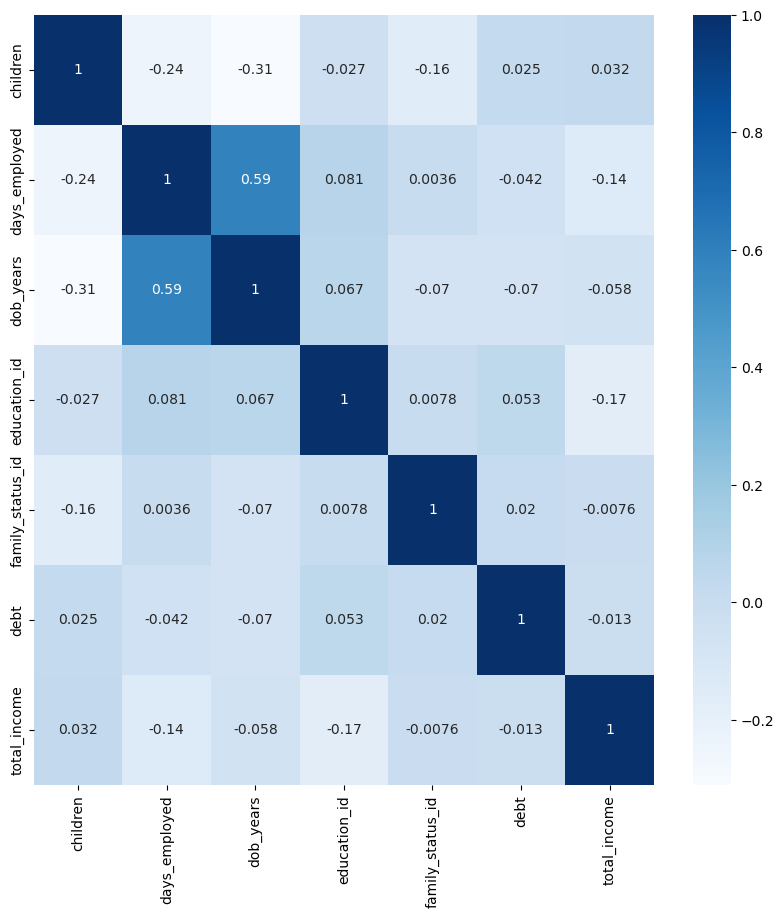

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

###### Проверим полученные данные о том, что зависимость между наличием детей в семье и возвратом кредита в срок слабая. Сначала проведем категоризацию семей по количеству детей. Запишем категории семей в новый столбец 'family_type' и выведем таблицу на экран.

In [31]:
def family_category(children):
    try:
        if children == 0:
            return 'Нет детей'
        elif children == 1:
            return '1 ребенок'
        elif children == 2:
            return '2 ребенка'
        elif children == 3:
            return '3 ребенка'
        elif children == 4:
            return '4 ребенка'
        elif children == 5:
            return '5 детей'
        return 'Многодетные'
    except:
        pass

data['family_type'] = data['children'].apply(family_category)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,family_type
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1 ребенок
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1 ребенок
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,Нет детей
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,3 ребенка
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,Нет детей


###### Посмотрим сколько всего заемщиков с разбивкой по категориям семей:

In [32]:
data.groupby('family_type', as_index=False)['children'].count().sort_values('children', ascending=False)

,family_type,children
5,Нет детей,14091
0,1 ребенок,4808
1,2 ребенка,2052
2,3 ребенка,330
3,4 ребенка,41
4,5 детей,9


In [33]:
data['family_type'].value_counts() / len(data['family_type'])

family_type
Нет детей    0.660588
1 ребенок    0.225400
2 ребенка    0.096198
3 ребенка    0.015470
4 ребенка    0.001922
5 детей      0.000422
Name: count, dtype: float64

###### Теперь выясним какие категории семей имеют задолженности, а какие нет.

In [34]:
data.groupby('debt')['family_type'].value_counts()

debt  family_type
0     Нет детей      13028
      1 ребенок       4364
      2 ребенка       1858
      3 ребенка        303
      4 ребенка         37
      5 детей            9
1     Нет детей       1063
      1 ребенок        444
      2 ребенка        194
      3 ребенка         27
      4 ребенка          4
Name: count, dtype: int64

###### Визуализируем полученные данные.

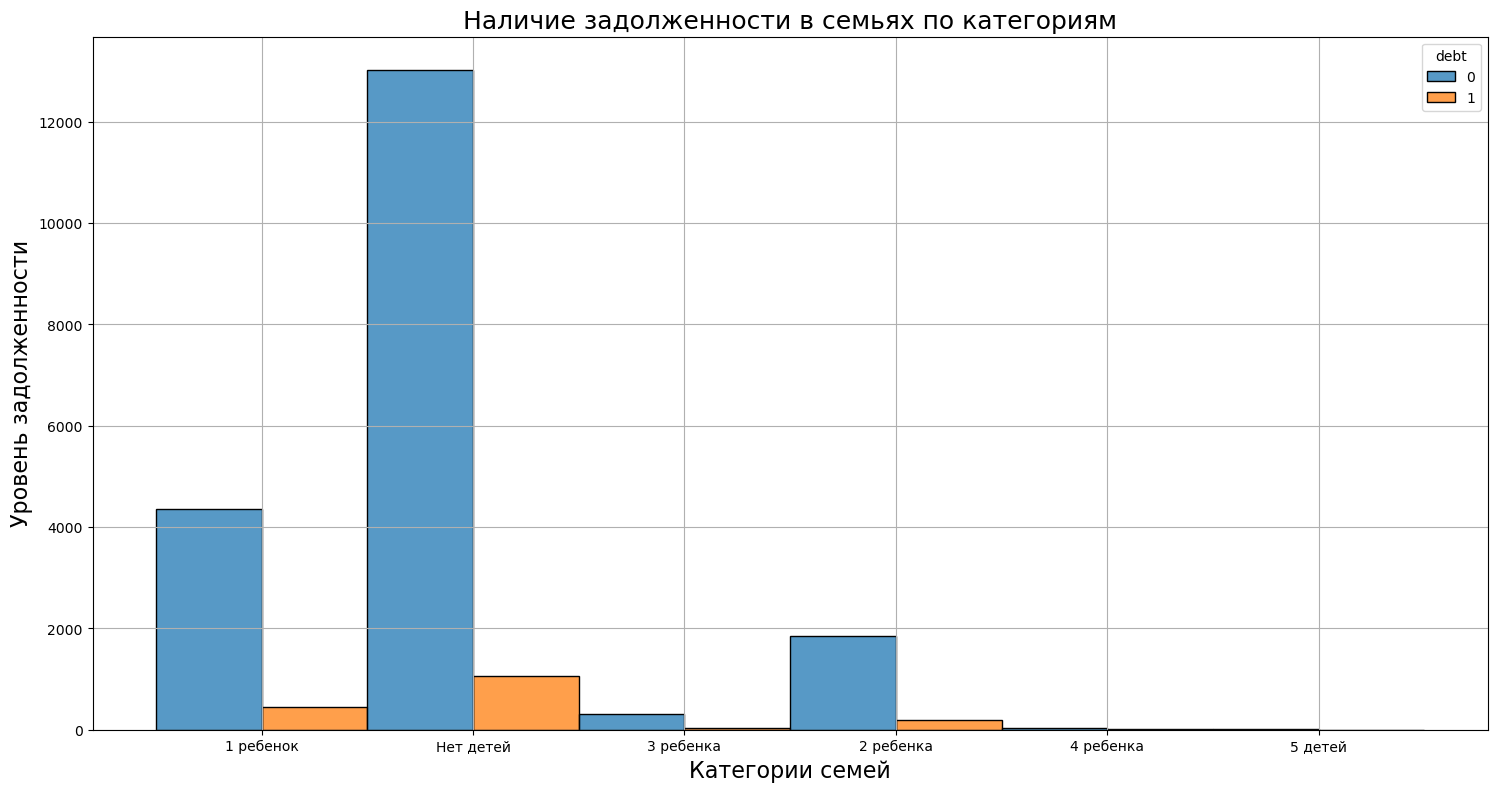

In [35]:
plt.figure(figsize=(18,9))
sns.histplot(data=data, x='family_type', hue='debt', multiple='dodge')
plt.title('Наличие задолженности в семьях по категориям', fontsize=18)
plt.xlabel('Категории семей', fontsize=16)
plt.ylabel('Уровень задолженности', fontsize=16)
plt.grid()
plt.show()

###### Отобразим эти полученные данные в процентах.

In [36]:
data.groupby('debt')['family_type'].value_counts(normalize=True)

debt  family_type
0     Нет детей      0.664728
      1 ребенок      0.222664
      2 ребенка      0.094801
      3 ребенка      0.015460
      4 ребенка      0.001888
      5 детей        0.000459
1     Нет детей      0.613741
      1 ребенок      0.256351
      2 ребенка      0.112009
      3 ребенка      0.015589
      4 ребенка      0.002309
Name: proportion, dtype: float64

###### Сгруппируем итоговую таблицу с процентным отношением должников по каждой категории семей.

In [37]:
data_grouped = data.groupby('children').agg({'debt':['count', 'sum']})
data_grouped['percent'] = data_grouped[('debt', 'sum')] / data_grouped[('debt', 'count')] * 100
data_grouped

debt         percent
          count   sum          
children                       
0         14091  1063  7.543822
1          4808   444  9.234609
2          2052   194  9.454191
3           330    27  8.181818
4            41     4  9.756098
5             9     0  0.000000

**Вывод:** 

В результате исследования была сформулирована гипотеза о том, что возврат задолженности зависит от наличия детей в семье заемщиков. Таким образом, были выбраны две переменные - 'family_type' и 'debt'. 

В ходе проверки гипотезы было выявлено, что корреляция между этими двумя переменными слабая, в признаке количества детей имеется несбалансированность классов и размеры некоторых групп слишком малы и не позволяют нам сделать корректный вывод. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

###### Сгруппируем данные для просмотра информации о количестве семей по имеющимся статусам.

In [38]:
data.groupby('family_status_id')['family_status'].value_counts()

family_status_id  family_status        
0                 женат / замужем          12261
1                 гражданский брак          4134
2                 вдовец / вдова             951
3                 в разводе                 1189
4                 Не женат / не замужем     2796
Name: count, dtype: int64

###### Визуализируем данные

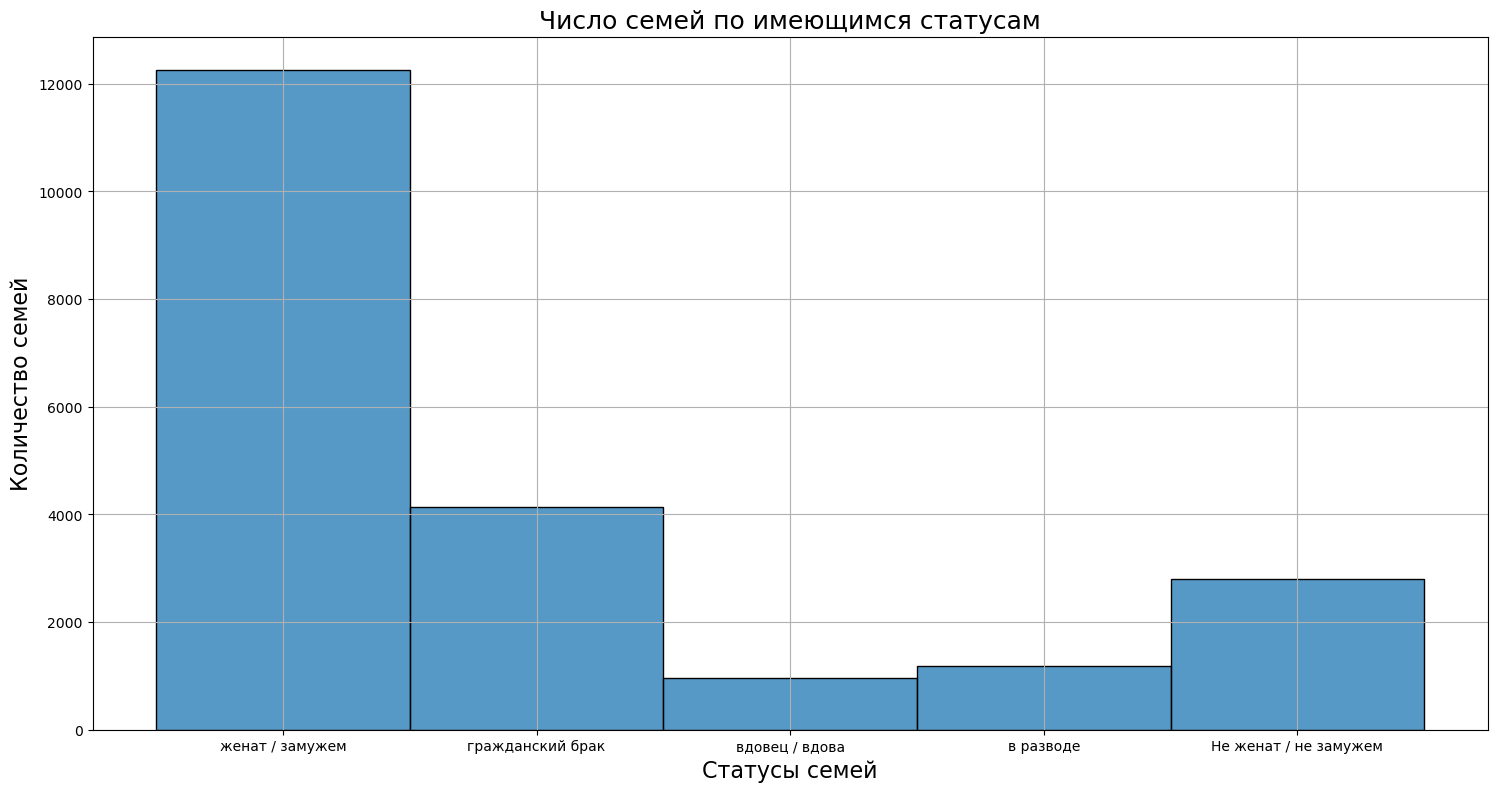

In [39]:
plt.figure(figsize=(18,9))
sns.histplot(data['family_status'])
plt.title('Число семей по имеющимся статусам', fontsize=18)
plt.xlabel('Статусы семей', fontsize=16)
plt.ylabel('Количество семей', fontsize=16)
plt.grid()
plt.show()

###### Создадим таблицу с выборкой и расчетом доли должников по каждому семейному положению.

In [40]:
data.pivot_table(index='family_status', columns=None, values='debt', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


###### Посмотрим корреляцию изучаемых признаков. Для этого добавим новый признак 'family_status_num', который будет содержать семейные статусы переведенные из категориальных в числовые. Для этого напишем функцию.

In [41]:
def numerical_family_status(data):
    if data['family_status'] == 'Не женат / не замужем':
        return 0
    elif data['family_status'] == 'в разводе':
        return 1
    elif data['family_status'] == 'вдовец / вдова':
        return 2
    elif data['family_status'] == 'гражданский брак':
        return 3
    elif data['family_status'] == 'женат / замужем':
        return 4
    else:
        return 0

    return result


data['family_status_num'] = data.apply(numerical_family_status, axis = 1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,family_type,family_status_num
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1 ребенок,4
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1 ребенок,4
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,Нет детей,4
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,3 ребенка,4
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,Нет детей,3


In [42]:
data.pivot_table(index='family_status_num', 
                 columns=None, 
                 values='debt', 
                 aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
family_status_num,,,
0,2796,273,0.097639
1,1189,84,0.070648
2,951,63,0.066246
3,4134,385,0.093130
4,12261,927,0.075606


###### Посмотрим корреляцию признаков

In [43]:
print(data['family_status_num'].corr(data['debt']))

-0.02018112016278689


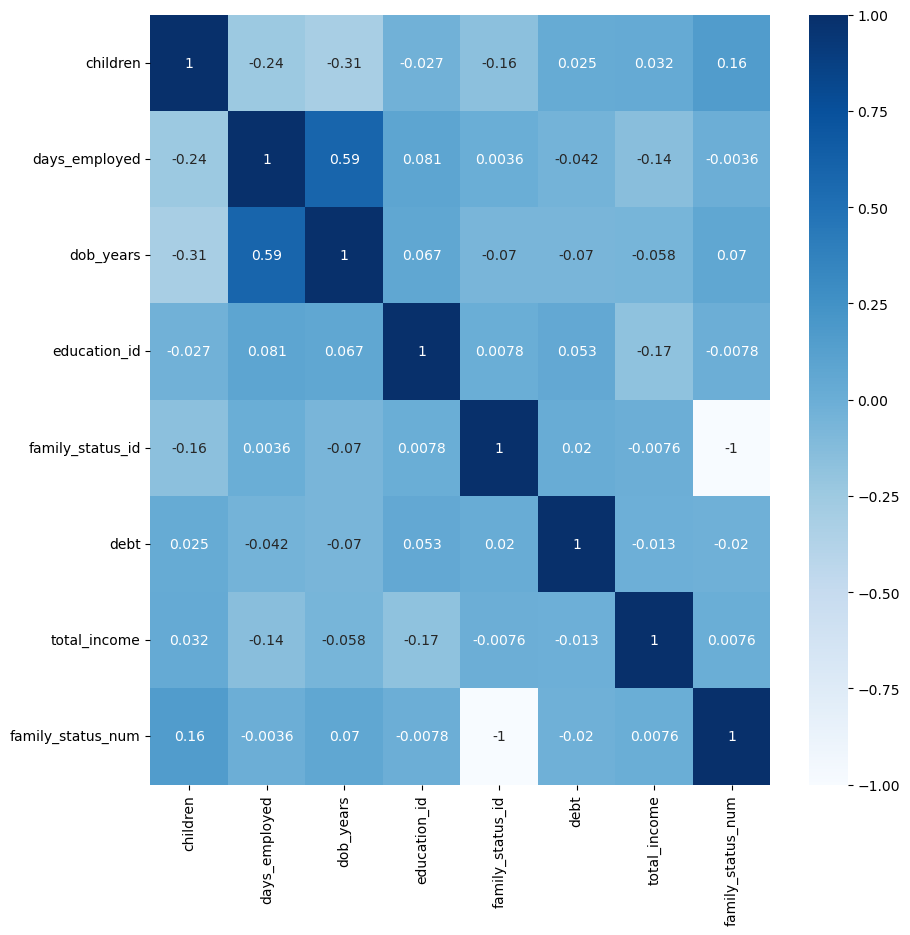

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

**Вывод:** 

В результате исследования была сформулирована гипотеза о том, что имеется зависимость между семейным положением и возвратом кредита в срок. Таким образом, были выбраны два признака - 'family_status' и 'debt'. 

1. По итогам рассмотрения выявлено, что корреляции между признакми нет, что говорит об отсутствии связи между переменными. 


2. Должники присутсвуют в каждой семейной категории, но самый высокий процент должников среди не женатых (не замужних) заемщиков и заемщиков, состоящих в гражданком браке (9.7% и 9.3% соответственно). Таким образом, выявлены группы заемщиков, оказывающих наибольшее влияние на возврат кредитов в установленные сроки.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

###### Выведем сведения о категориях кредитополучателей.

In [45]:
data['total_income_category'].value_counts()

total_income_category
C    15921
B     5014
D      349
A       25
E       22
Name: count, dtype: int64

###### Доли каждой группы кредиотполучателей

In [46]:
data['total_income_category'].value_counts(normalize=True)

total_income_category
C    0.746379
B    0.235057
D    0.016361
A    0.001172
E    0.001031
Name: proportion, dtype: float64

###### Визуализируем данные

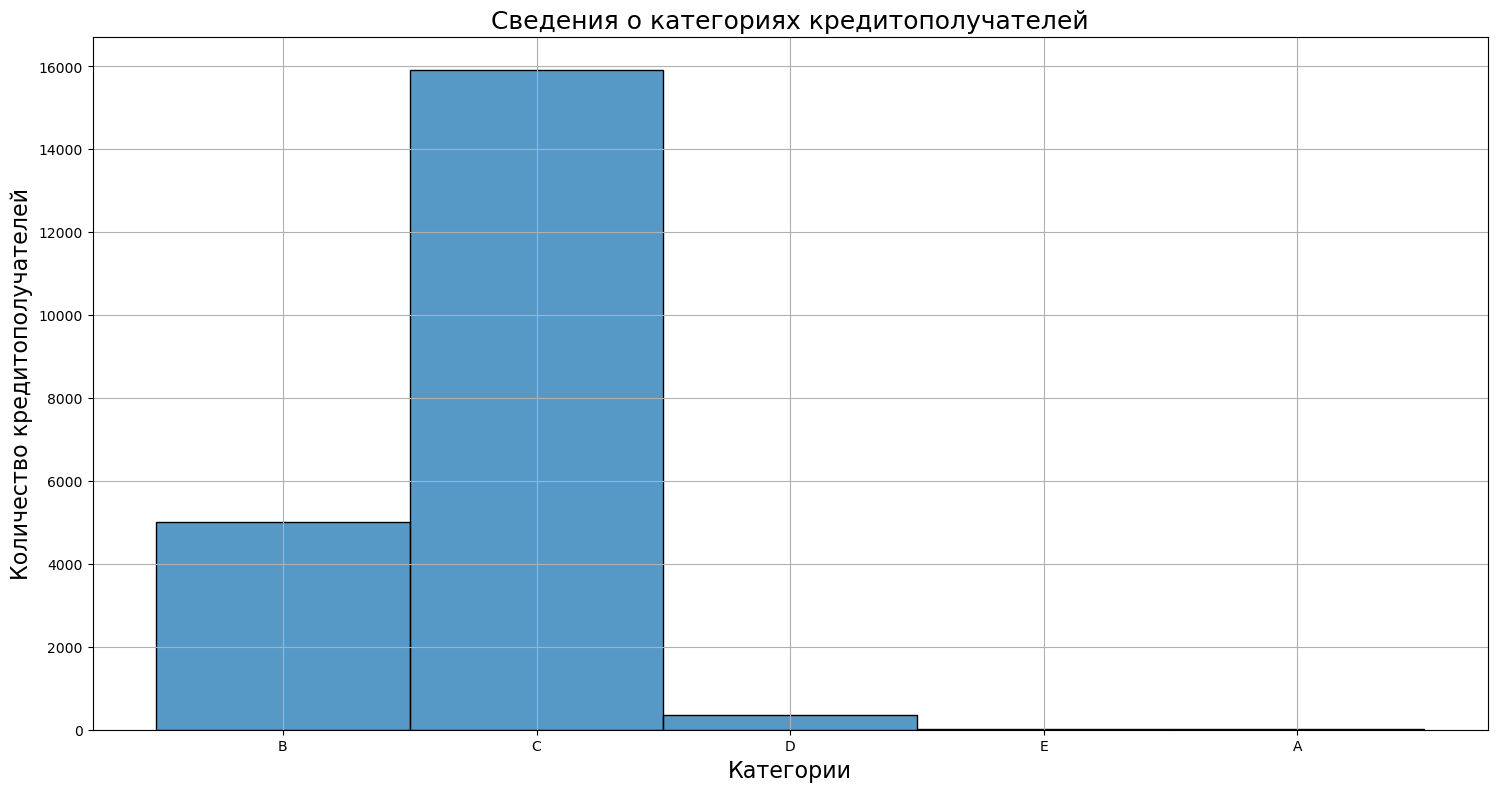

In [47]:
plt.figure(figsize=(18,9))
sns.histplot(data['total_income_category'])
plt.title('Сведения о категориях кредитополучателей', fontsize=18)
plt.xlabel('Категории', fontsize=16)
plt.ylabel('Количество кредитополучателей', fontsize=16)
plt.grid()
plt.show()

###### Создадим таблицу с выборкой и расчетом доли должников по каждой категории кредитополучателя.

In [48]:
data.pivot_table(index='total_income_category', 
                 columns=None, 
                 values='debt', 
                 aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


###### Проверим корреляцию изучаемых признаков. Для этого добавим новый признак 'total_income_category_num', который будет содержать категории замщиков по уровню дохода переведенные из категориальных в числовые. Для этого напишем функцию.

In [49]:
def numerical_total_income_category(data):
    if data['total_income_category'] == 'A':
        return 0
    elif data['total_income_category'] == 'B':
        return 1
    elif data['total_income_category'] == 'C':
        return 2
    elif data['total_income_category'] == 'D':
        return 3
    elif data['total_income_category'] == 'E':
        return 4
    else:
        return 0

    return result


data['total_income_category_num'] = data.apply(numerical_total_income_category, axis = 1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,family_type,family_status_num,total_income_category_num
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1 ребенок,4,1
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1 ребенок,4,2
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,Нет детей,4,2
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,3 ребенка,4,1
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,Нет детей,3,2


In [50]:
data.pivot_table(index='total_income_category_num', 
                 columns=None, 
                 values='debt', 
                 aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
total_income_category_num,,,
0,25,2,0.080000
1,5014,354,0.070602
2,15921,1353,0.084982
3,349,21,0.060172
4,22,2,0.090909


###### Посмотрим корреляцию признаков

In [51]:
print(data['total_income_category_num'].corr(data['debt']))

0.017236036824254855


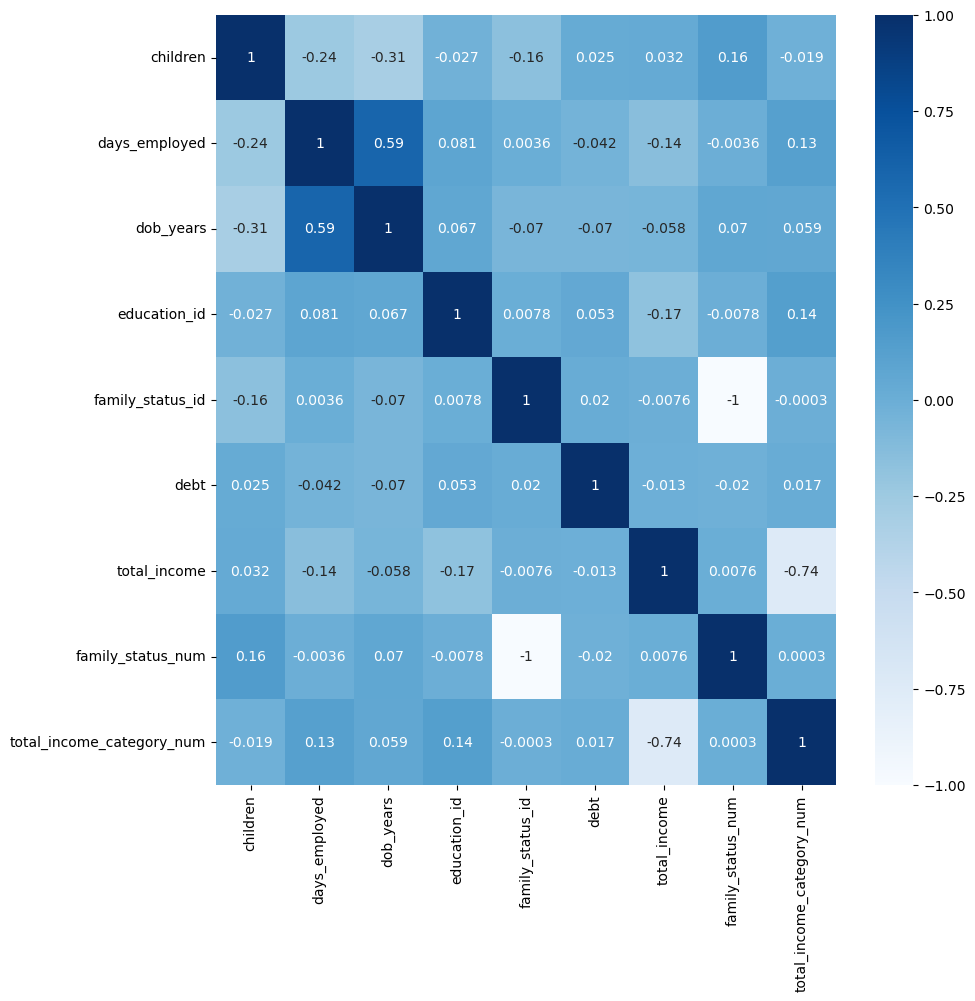

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

**Вывод:** 

В результате исследования была сформулирована гипотеза о том, что имеется зависимость между уровнем дохода заемщиков и возвратом кредита в срок. Таким образом, были выбраны два признака - 'total_income_category' и 'debt'.

1. По итогам исследования выявлено, что корреляция между признаками слабая, что говорит об отсутствии связи между переменными. 


2. Наиболее рискованная категория заемщиков "Е". В ней самый большой процент должников (9%).


3. Далее следует категория "С" - 8.4%, она же и самая значительная категория, заемщики в которой составляют 74.6% от общего числа кредиотполучателей.


4. Но в категории "Е" наименьшее количество заемщиков - всего 22 человека, также и в категории "А" всего 25 человек. Их можно исключить из выборки, их доля не является статистически значимой (чуть более одной сотой процента каждая: 0.01031 и 0.01172 соответственно).


5. Следует и обратить внимание также на маленький объем выборки группы "D" более 300 человек всего, а количество заемщиков с задолженностью - всего 22 человека. Данный объем выборки также является маленьким и статистически не значимым.


6. Таким образом, необходимо особое внимание обратить на категорию "С" и следующую за ней как по количеству заемщиков так и доле задолжников категории "В". Вместе категории "С" и "В" составляют 98.1% всех заемщиков.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

###### Получим данные о целях кредита и их количественных характеристиках.

In [53]:
data['purpose_category'].value_counts()

purpose_category
операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: count, dtype: int64

###### Посмотрим какую долю занимает каждая цель в общем количестве

In [54]:
data['purpose_category'].value_counts(normalize=True)

purpose_category
операции с недвижимостью    0.504008
операции с автомобилем      0.200600
получение образования       0.186958
проведение свадьбы          0.108434
Name: proportion, dtype: float64

###### Визуализируем полученные данные

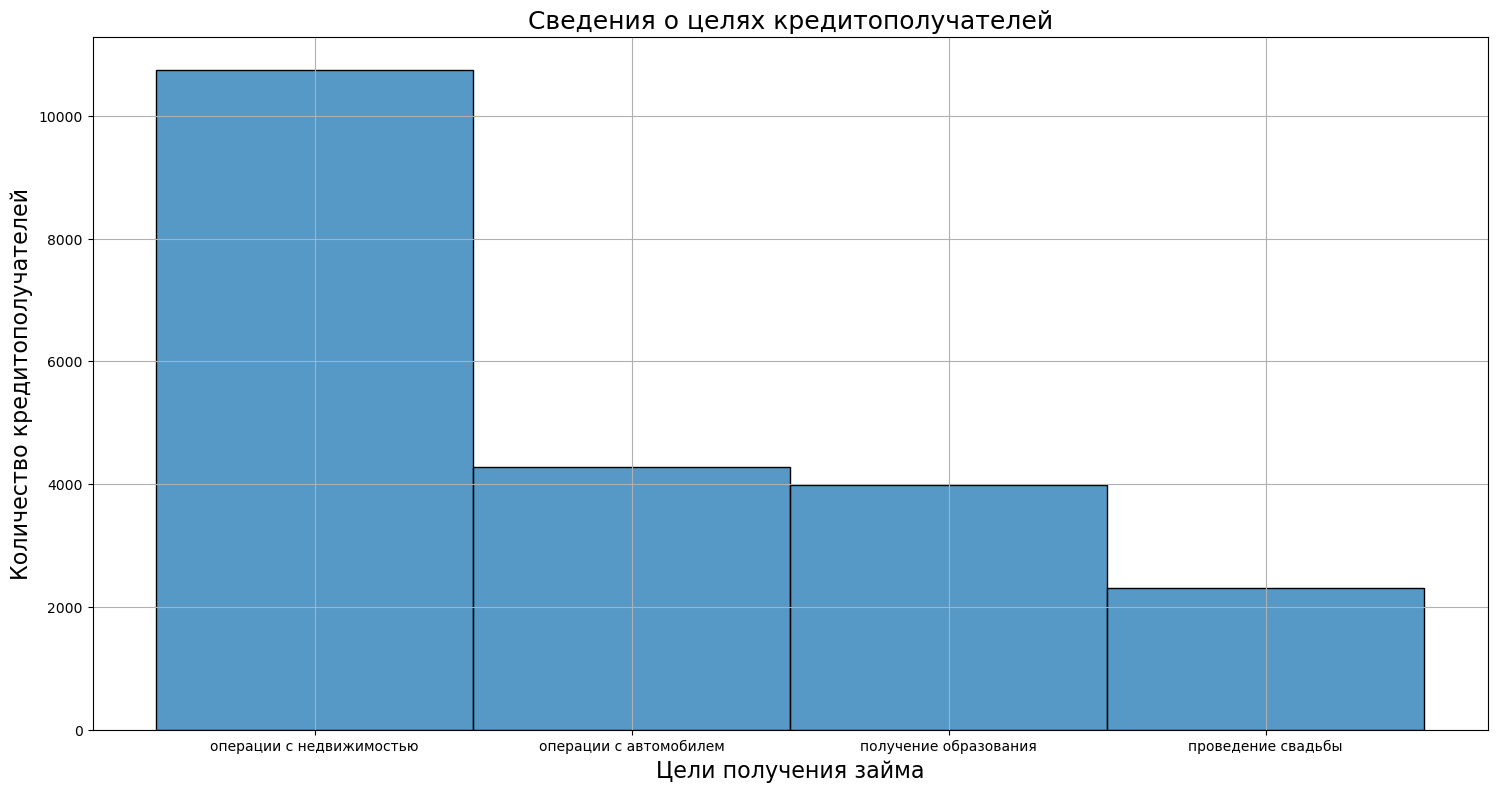

In [55]:
plt.figure(figsize=(18,9))
sns.histplot(data['purpose_category'])
plt.title('Сведения о целях кредитополучателей', fontsize=18)
plt.xlabel('Цели получения займа', fontsize=16)
plt.ylabel('Количество кредитополучателей', fontsize=16)
plt.grid()
plt.show()

###### Составим таблицу с выборкой и расчетом доли должников по каждой цели кредита.

In [56]:
data.pivot_table(index='purpose_category', 
                 columns=None, 
                 values='debt', 
                 aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


###### Проверим корреляцию изучаемых признаков. Для этого добавим новый признак 'purpose_category_num', который будет содержать категории целей займов переведенные из категориальных в числовые. Для этого напишем функцию.

In [57]:
def numerical_purpose_category(data):
    if data['purpose_category'] == 'операции с автомобилем':
        return 0
    elif data['purpose_category'] == 'операции с недвижимостью':
        return 1
    elif data['purpose_category'] == 'получение образования':
        return 2
    elif data['purpose_category'] == 'проведение свадьбы':
        return 3
    else:
        return 0

    return result


data['purpose_category_num'] = data.apply(numerical_purpose_category, axis = 1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,family_type,family_status_num,total_income_category_num,purpose_category_num
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1 ребенок,4,1,1
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1 ребенок,4,2,0
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,Нет детей,4,2,1
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,3 ребенка,4,1,2
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,Нет детей,3,2,3


###### Посмотрим корреляцию признаков

In [58]:
print(data['purpose_category_num'].corr(data['debt']))

-0.0033011327010892574


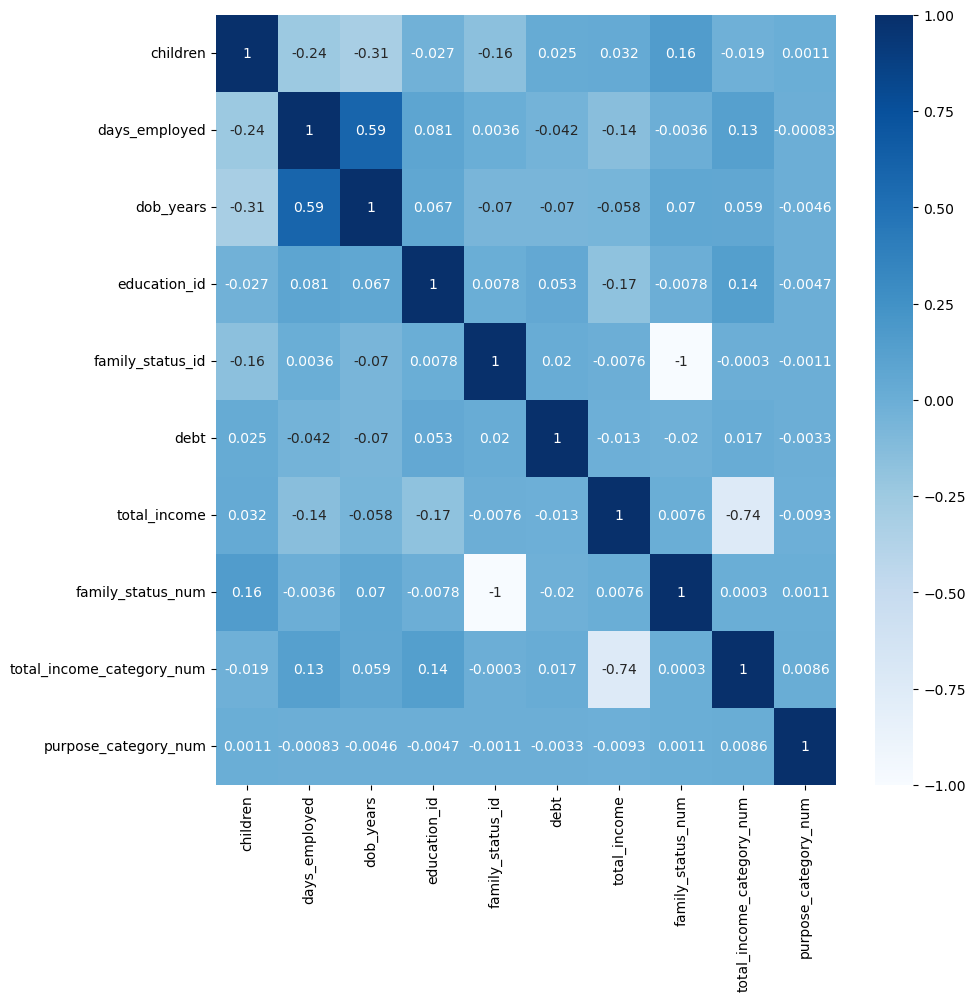

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

**Вывод:** 

В результате исследования была сформулирована гипотеза о том, что имеется зависимость между целями получения кредита и возвратом кредита в срок. Таким образом, были выбраны два признака - 'purpose_category' и 'debt'.

1. По итогам исследования выявлено, что корреляция между признаками отрицательная и слабая, что говорит об отсутствии связи между переменными.


2. Операции с автомобилями и получение образования содержат наибольшие доли должников: 9.3% и 9.2% соответственно. Доля кредитов в этих категориях составляет 38% от общего количества. Попадание в лидеры по задолжности заемщиков автокредитов связана, по всей видимости, с несколькими причинами. Во-первых, автомобиль не является средством первой необходимости и платежная дисциплина по данному виду кредита может отличаться от выплаты, например, по ипотечному кредиту, который в жизненном приоритете может занимать довольно высокую позицию. Вторая причина, вероятно комбинированная и кроется с одной стороны высокими ставками по автокредитами и, с другой стороны одновременным падением уровня доходов населения и высоким уровнем подоражания автомобилей и ростом инфляции за последние годы.


3. Вероятно, что большая доля задолженностей по образовательным кредитам связана с низким уровнем дохода и платежеспсобности. В этой категории должников возможно присутствует большое количество лиц молодого возраста, которым приходится одновременно и работать и учиться, что представляет проблему и отражается на платежеспособности. Более подробно это можно выяснить только углубленным иссследованием с добавлением третьей переменной - возраста заемщика и его социального статуса (студент, незанятый и т. д.). Заемщикам этой категории наиболее выгодно сегодня воспользоваться образовательным кредитом, которые выдаются банками под низкий процент и, соответственно снизят долговую нагрузку на заемщика и повысят его надежность для банка.


4. Операции с недвижимостью, несмотря на их подавляющее большинство, имеют самую низкую долю должников - 7.2%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Технические причины (невозможность получить или собрать данные), субъективные (ошибки ввода данных, непредоставление данных различными субъектами).

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана устойчива к выбросам, в отличие от среднего значения.

### Шаг 4: общий вывод.

Основной целью нашего исследования надежности заемщиков было изучение различных финансовых и нефинансовых характеристик кредитополучателей и определение их уровня влияния на платежную дисциплину.


В свою очередь, получение новых данных о конкретных категориях должников позволит кредитным организациям проводить более гибкую и осторожную кредитную политику, разрабатывая новые продуманные и адаптированные финансовые продукты и предложения для отдельных категоирй заемщиков, которые будут непосредственно отвечать реальным условиям и сократят долю невозвратных и просроченных кредитов. Следствием этого также станет снижение доли рискованных операций, проводимых кредитными организациями.


Исследование проводилось в несколько этапов. На первом этапе проводился сбор данных и их подготовка для анализа. На втором этапе проводилось изучение как основных показателей описательной статистики, так и более глубокие исследования данных - выявление зависимостей среди переменных и определение уровня их корреляции, атакже категоризации и группировки данных по разным признакам для проверки гипотез исследования о зависимостях целевой переменной (надежности заемщика) от таких переменных, которые зарактеризуют финансовое и социальное положение заемщика (уровень дохода, наличие семьи и детей, цели кредитования). Третий этап исследования - заключительный в ходе которого подводятся итоги, описываются полученные результаты и делаются основные выводы по изучению влияния на платежеспособность каждой переменной.

Исследование заемщиков показывает, что на возвратность кредитов все вышеуказанны переменные влияют по-разному.


Для кредитных организаций можно выделить следующие группы риска среди заемщиков для последующего принятия решений, выработки стратегии эффективной кредитной политики, выстраиванию правильной политики и риск-менеджмента в организации, а также формированию маркетинговых мероприятий для разработки новых кредитных продуктов.


Во-первых, необходимо обратить внимание на такую группу заемщиков как семьи без детей, которая составляет большинство от общего количества семей-должников (61%). Наибольшие доли должников в категориях семей с детьми - это семьи с 4 и с 2 детьми, их доля составляет 9.75% и 9.45% соответственно.


Во-вторых, слудует учитывать, что должники присутсвуют также в каждой семейной категории, но самый высокий процент должников среди не женатых (не замужних) заемщиков и заемщиков, состоящих в гражданком браке (9.7% и 9.3% соответственно). Следует учитывать эти категории как оказывающие наибольшее влияние на возврат кредитов в установленные сроки в семейных категориях.


В-третьих, на платежеспособность кредитополучателей влияет естественным образом уровень дохода заемщиков. Необходимо особое внимание обратить на категорию "С" и следующую за ней как по количеству заемщиков так и доле задолжников категории "В". Вместе категории "С" и "В" составляют 98.1% всех заемщиков.


В-четвертых, различные цели кредита также в итоге влияют на появление задолженности. Операции с автомобилями и получение образования содержат наибольшие доли должников: 9.3% и 9.2% соответственно. Доля кредитов в этих категориях составляет 38% от общего количества. Операции с недвижимостью имеют самую низкую долю должников - 7.2%, но на эту категорию кредитополучаталей следует обратить особое внимание, так как она составляет подавляющее большинство в общем объеме задолжников (свыше 50%).